In [1]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters

In [2]:
# Display images side by side
def show_images(images, titles, cmap="gray"):
    plt.figure(figsize=(15, 8))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(2, 3, i + 1)
        plt.imshow(img, cmap=cmap)
        plt.title(title)
        plt.axis("off")
    plt.show()

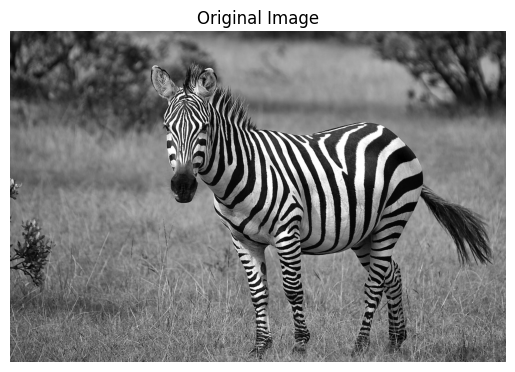

In [3]:
# Load the image
img = cv2.imread("image.jpg", cv2.IMREAD_GRAYSCALE)

if img is None:
    raise FileNotFoundError("Image not found! Please put 'image' in the working directory.")

plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.show()

In [4]:
# Sobel Edge Detection
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel = np.hypot(sobelx, sobely).astype(np.uint8)

In [5]:
# Prewitt Edge Detection (using convolution kernels)
kernelx = np.array([[ -1, 0, 1],
                    [ -1, 0, 1],
                    [ -1, 0, 1]])
kernely = np.array([[ -1, -1, -1],
                    [  0,  0,  0],
                    [  1,  1,  1]])
prewittx = cv2.filter2D(img, -1, kernelx)
prewitty = cv2.filter2D(img, -1, kernely)
prewitt = cv2.add(prewittx, prewitty)

In [6]:
# Roberts Edge Detection
roberts_cross_v = np.array([[1, 0],
                            [0, -1]])
roberts_cross_h = np.array([[0, 1],
                            [-1, 0]])
roberts_v = cv2.filter2D(img, -1, roberts_cross_v)
roberts_h = cv2.filter2D(img, -1, roberts_cross_h)
roberts = cv2.add(roberts_v, roberts_h)

In [7]:
# Laplacian of Gaussian (LoG)
blurred = cv2.GaussianBlur(img, (3, 3), 0)
log = cv2.Laplacian(blurred, cv2.CV_64F)
log = np.uint8(np.absolute(log))

In [8]:
# Canny Edge Detection
canny = cv2.Canny(img, 100, 200)

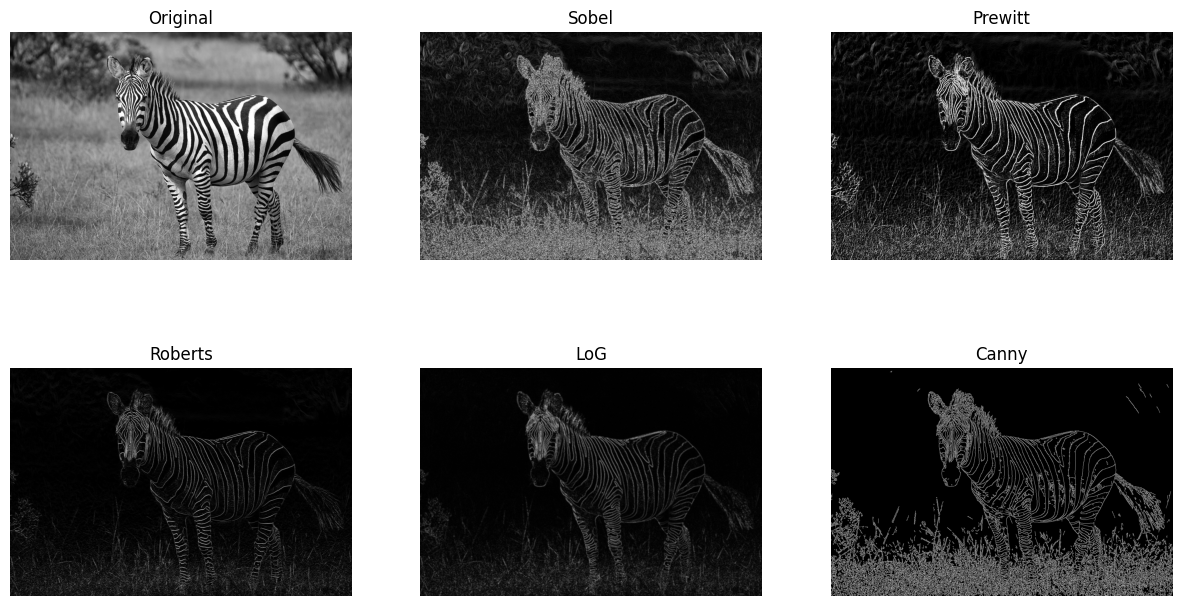

In [9]:
# Show all results together
show_images(
    [img, sobel, prewitt, roberts, log, canny],
    ["Original", "Sobel", "Prewitt", "Roberts", "LoG", "Canny"]
)